In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns

In [3]:
data = pd.read_csv('data2.csv')

In [4]:
data.columns

Index(['OBJECT_ID', 'OBJECT_NAME', 'NORAD_CAT_ID', 'COUNTRY', 'PERIOD',
       'INCLINATION', 'APOGEE', 'PERIGEE', 'RCS_SIZE', 'RCSVALUE', 'LAUNCH',
       'COMMENT'],
      dtype='object')

In [5]:
#features = ['Name of Satellite, Alternate Names','Class of Orbit', 'Type of Orbit','Perigee (km)', 'Apogee (km)', 'Eccentricity', 'Inclination (degrees)', 'Launch Mass (kg.)', 'Dry Mass (kg.)', 'Expected Lifetime (yrs.)']
features = ['OBJECT_ID','APOGEE', 'PERIGEE', 'INCLINATION']
data1 = data[features]

In [23]:
data1
#data_leo = data1.loc[(data1['Class of Orbit']=='LEO') & (data1['Apogee (km)'])]
#data_leo
data_leo = data1.loc[(data1['PERIGEE']>400) & (data1['PERIGEE']<1100) ]
data_leo.head()

,OBJECT_ID,APOGEE,PERIGEE,INCLINATION
4,2013-065D,1135.0,815.0,100.60
5,2018-073A,409.0,403.0,51.64
6,2013-065G,1144.0,962.0,100.92
7,2013-065F,1102.0,699.0,100.50
8,2013-065E,1134.0,806.0,100.55


In [24]:
X = data_leo[['PERIGEE']]
y = data_leo[['INCLINATION']]

In [25]:
%matplotlib inline 
import matplotlib.pyplot as plt
#plt.scatter(X,y,s=5)

In [26]:
X_cuml = data_leo[['PERIGEE']]- (data_leo[['PERIGEE']]%100)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


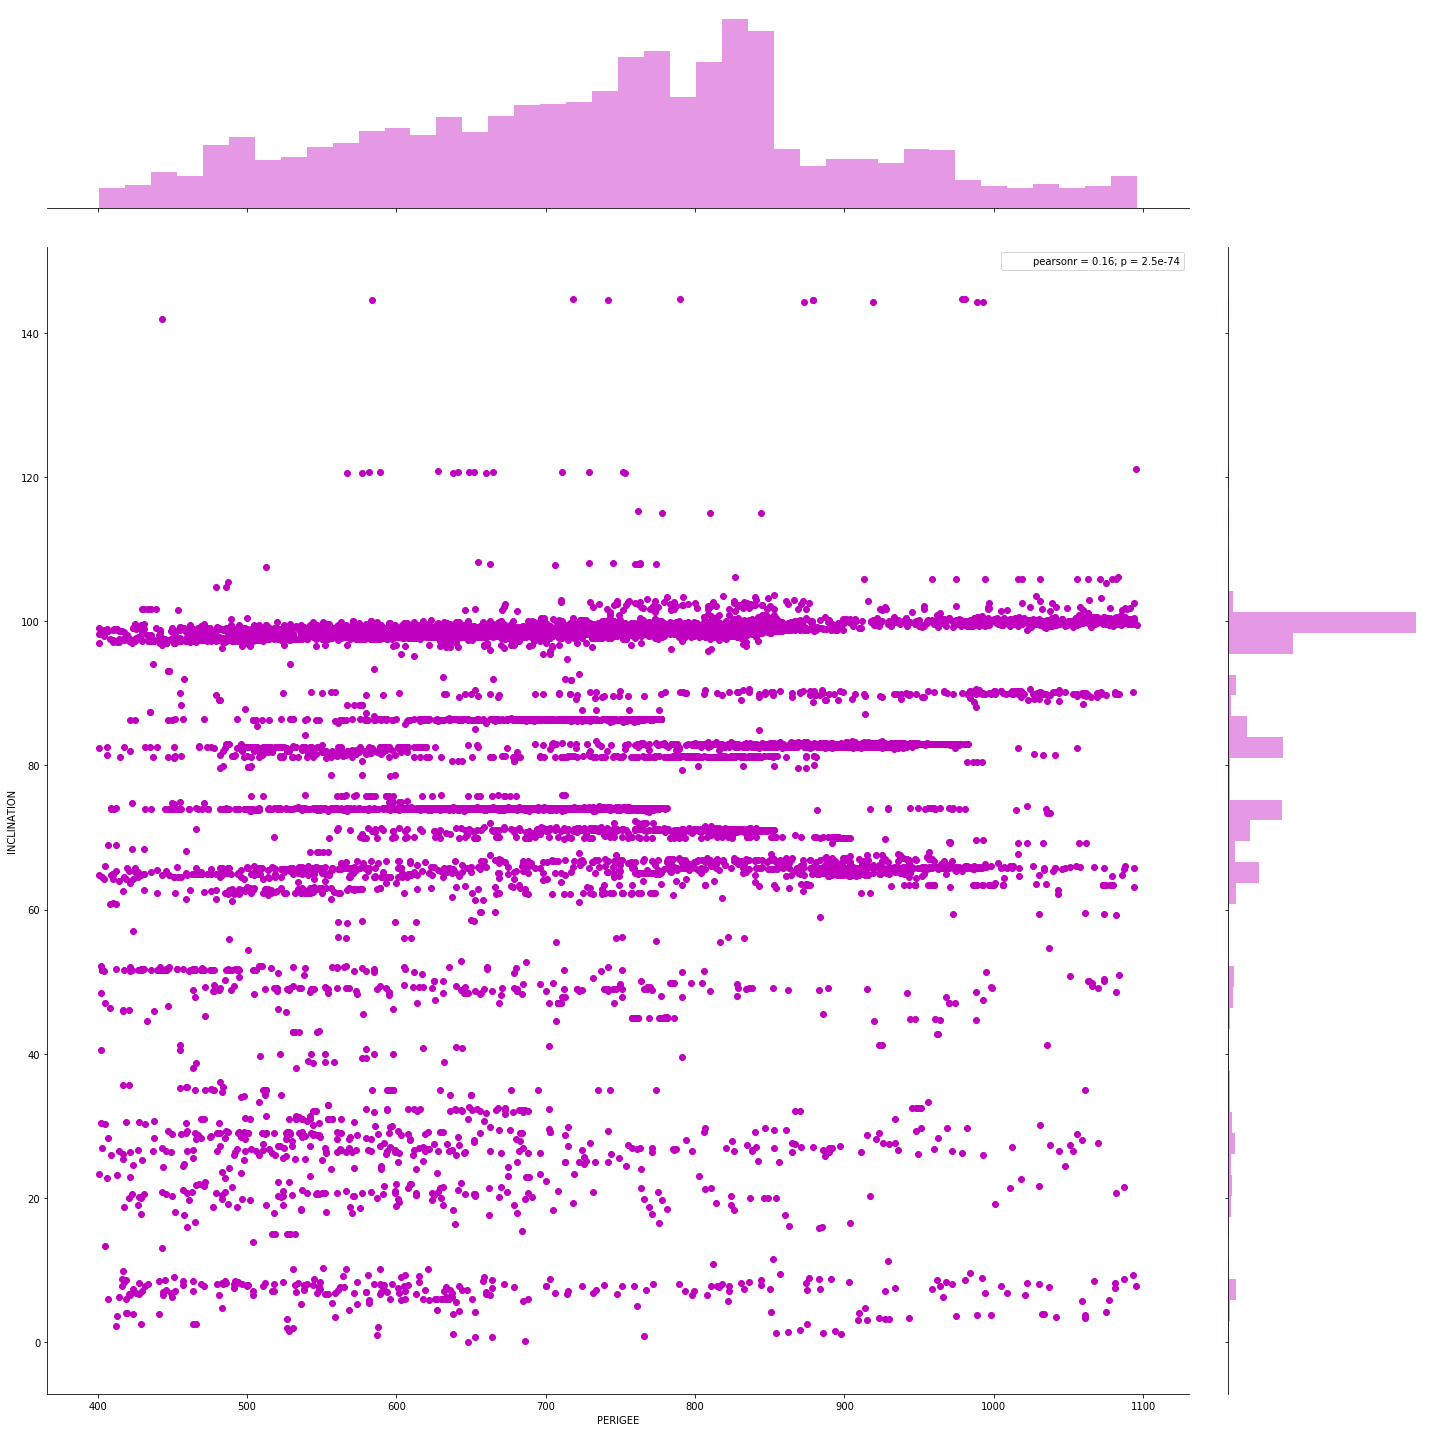

In [30]:
g = sns.jointplot("PERIGEE", "INCLINATION", data=data_leo, kind="scatter", color="m", size=20, ratio=5)
g.savefig('INCLINATION.png')

In [28]:
plot =X_cuml.groupby(['PERIGEE']).size()
plot = pd.DataFrame(plot)
plot

,0
PERIGEE,
400.0,1004
500.0,1581
600.0,2228
700.0,3246
800.0,2916
900.0,1197
1000.0,570


In [29]:
plot.to_csv('histogram_data.csv', index=False)